### Binary Search

In [1]:
l = [10, 20, 30, 40, 50, 60]

In [2]:
import time

def binary_search(v, l):
    if not l:
        return False

    m = len(l) // 2

    if v == l[m]:
        return True
    elif v < l[m]:
        return binary_search(v, l[:m])
    else:
        return binary_search(v, l[m + 1:])

In [3]:
print(binary_search(50,l))

True


### Adjacency List

In [33]:
num_nodes = 5
edges = ((0,1),(0,4),(1,2),(1,3),(1,4),(2,3),(3,4))

In [34]:
class Graph:
    def __init__(self, num_nodes, edges):
        self.num_nodes = num_nodes
        self.data = [[] for _ in range(num_nodes)]
        for n1,n2 in edges:
            self.data[n1].append(n2)
            self.data[n2].append(n1)

    def add_edge(self,edge):
        for n1,n2 in [edge]:
            self.data[n1].append(n2)
            self.data[n2].append(n1)
    
    def __repr__(self):
        return "\n".join(["{}: {}".format(n,neighbors) for n,neighbors in enumerate(self.data)])

    def __str__(self):
        return self.__repr__()

In [35]:
graph1 = Graph(num_nodes, edges)

In [36]:
graph1

0: [1, 4]
1: [0, 2, 3, 4]
2: [1, 3]
3: [1, 2, 4]
4: [0, 1, 3]

In [37]:
graph1.add_edge((0,3))
graph1

0: [1, 4, 3]
1: [0, 2, 3, 4]
2: [1, 3]
3: [1, 2, 4, 0]
4: [0, 1, 3]

### Selection Sort

In [1]:
L = [40,20,60,10,50,30]

In [6]:
def selection_sort(L):
    for i in range(0,len(L)-1):
    
        #min is the index number of the minimum element in list
        min = i
    
        #this loops checks the current min to rest of the elements in list
        for j in range(i+1,len(L)):
            if L[j] < L[min]:
                min = j
            else:
                pass
    
        #Swapping the elements
        if min != i:
            swap = L[i]
            L[i] = L[min]
            L[min] = swap

    print(L)

In [7]:
selection_sort(L)

[10, 20, 30, 40, 50, 60]


<hr>

Best/Worse cases of selection sort are $order(n^2)$

### Insertion Sort

In [33]:
A = [40,20,60,10,50,30]

In [36]:
def insertion_sort(A):
    for i in range(1,len(A)):
        key = A[i]
        j = i-1

        while j > -1 and A[j] > key:
            A[j+1] = A[j]
            j = j-1
        A[j+1] = key
    return A

In [37]:
print(insertion_sort(A))

[10, 20, 30, 40, 50, 60]


<hr>

Best case for insertion sort is of -> $order(n)$ <br>
Worse case for insertion sort is of -> $order(n^2)$

### Merge Sort

In [2]:
l2 = [8,2,4,7,1,3,9,6,5]

In [5]:
def merge(A,B):
    (m,n) = (len(A),len(B))
    (c,i,j) = ([],0,0)
    
    #Case-1
    while i<m and j<n:
        if A[i] <= B[j]:
            c.append(A[i])
            i+=1
        else:
            c.append(B[j])
            j+=1
    
    #Case-2
    while i<m:
        c.append(A[i])
        i+=1
    
    #Case-3
    while j<n:
        c.append(B[j])
        j += 1
        
    return c
    
    
def mergesort(l):
    n = len(l)
    if n <= 1:
        return l
    Left_Half = mergesort(l[:n//2])
    Right_Half = mergesort(l[n//2:])
    Sorted_Merged_List = merge(Left_Half,Right_Half)
    return Sorted_Merged_List

In [6]:
print(mergesort(l2))

[1, 2, 3, 4, 5, 6, 7, 8, 9]


### Quick Sort

In [12]:
l = [8,2,4,7,1,3,9,6,5]

In [13]:
def quick_sort(l):
    
    if len(l) == 1:
        return l
    
    pivot = l[-1]
    j = -1
    len_list = len(l)
    
    for i in range(len(l)):
        temp = None
        if l[i] < pivot and j+1 != i:
            j += 1
            temp = l[i]
            l[i] = l[j]
            l[j] = temp
        elif i == l.index(l[-1]):
            temp = l[i]
            l[i] = l[j+1]
            l[j+1] = temp
        else:
            pass

    return(l)
    

In [14]:
print(quick_sort(l))

[2, 4, 1, 3, 5, 7, 9, 6, 8]


### Adjacency Matrix

<b>This is the graph that we will define in python</b>

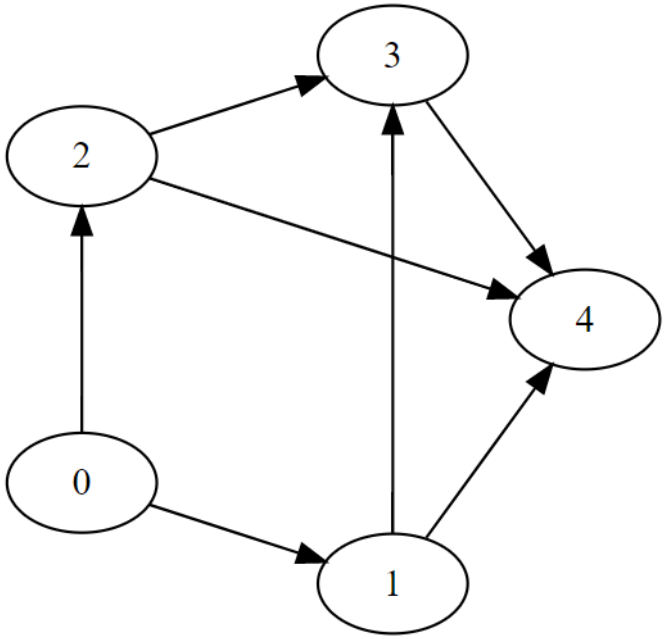

In [16]:
import numpy as np

V = [0,1,2,3,4]
E = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (2, 3), (3, 4)]

size = len(V)
Amat = np.zeros(shape=(size,size))

for (i,j) in E:
    Amat[i][j] = 1

In [34]:
print(Amat)

[[0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]]


In [32]:
AList = {}

for i in range(size):
    AList[i] = []
for (i,j) in E:
    AList[i].append(j)

In [33]:
for key,values in AList.items():
    print(f"{key} : {values}")

0 : [1, 2]
1 : [3, 4]
2 : [4, 3]
3 : [4]
4 : []


## BFS

<b>Implementing BFS using Adjancency List</b>

In [35]:
class Queue:

    def __init__(self):
        self.queue = []

    def enqueue(self,v):
        self.queue.append(v)

    def isempty(self):
        return(self.queue == [])    

    def dequeue(self):
        v = None
        if not self.isempty():
            v = self.queue[0]
            self.queue = self.queue[1:]
        return(v)    

    def __str__(self):
        return(str(self.queue))

In [36]:
# BFS Implementation For Adjacency list
def BFSList(AList,start_vertex):

    # Initialization
    visited = {}
    for each_vertex in AList.keys():
        visited[each_vertex] = False    

    # Create Queue object q
    q = Queue()

    # Mark the start_vertex visited and insert it into the queue 
    visited[start_vertex] = True
    q.enqueue(start_vertex)

    # Repeat the following until the queue is empty 
    while(not q.isempty()):

        # Remove the one vertex from queue
        curr_vertex = q.dequeue()

        # Visit each adjacent of the removed vertex (if not visited), mark that visited, and insert it into the queue 
        for adj_vertex in AList[curr_vertex]:
            if (not visited[adj_vertex]):
                visited[adj_vertex] = True
                q.enqueue(adj_vertex)               
    return(visited)

In [37]:
AList = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
print(BFSList(AList,0))

{0: True, 1: True, 2: True, 3: True, 4: True}


<b>Implementing BFS using Adjancency Matrix</b>

In [38]:
# Queue Implementation

class Queue:
    def __init__(self):
        self.queue = []

    def enqueue(self,v):
        self.queue.append(v)

    def isempty(self):
        return(self.queue == [])

    def dequeue(self):
        v = None
        if not self.isempty():
            v = self.queue[0]
            self.queue = self.queue[1:]
        return(v)    

    def __str__(self):
        return(str(self.queue))

In [39]:
# Function to return list of neighbours or adjacent vertex of vertex i
def neighbours(AMat,i):
    nbrs = []
    (rows,cols) = AMat.shape
    
    for j in range(cols):
        if AMat[i,j] == 1:
            nbrs.append(j)

    return(nbrs)

In [40]:
# BFS Implementation For Adjacency matrix
def BFS(AMat,start_vertex):
    
    # Initialization
    (rows,cols) = AMat.shape
    visited = {}
    
    for each_vertex in range(rows):
        visited[each_vertex] = False    

    # Create Queue object q
    q = Queue()

    # Mark the start_vertex visited and insert it into the queue 
    visited[start_vertex] = True
    q.enqueue(start_vertex)

    # Repeat the following until the queue is empty 
    while(not q.isempty()):

        # Remove the one vertex from queue
        curr_vertex = q.dequeue()

        # Visit the each adjacent of removed vertex(if not visited) and insert into the queue
        for adj_vertex in neighbours(AMat,curr_vertex):
            if (not visited[adj_vertex]):
                visited[adj_vertex] = True
                q.enqueue(adj_vertex)

    return(visited)

In [41]:
V = [0,1,2,3,4]
E = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (2, 3), (3, 4)] 
size = len(V)

import numpy as np
AMat = np.zeros(shape=(size,size))

for (i,j) in E:
    AMat[i,j] = 1

In [42]:
print(BFS(AMat,0))

{0: True, 1: True, 2: True, 3: True, 4: True}


## DFS

<b>Implementing DFS for adjacency list of graph</b>

In [43]:
# Stack Implementation

class Stack:
    def __init__(self):
        self.stack = []

    def Push(self,v):
        self.stack.append(v)

    def isempty(self):
        return(self.stack == [])

    def Pop(self):
        v = None
        
        if not self.isempty():
            v = self.stack.pop()
            
        return(v)    

    def __str__(self):
        return(str(self.stack))


# DFS Implementation for Adjacency list
def DFSList(AList,start_vertex):

    # Initializaion
    visited = {}

    for each_vertex in AList.keys():
        visited[each_vertex] = False    

    # Create stack object st
    st = Stack()

    # Push start_vertex in to the stack as first vertex
    st.Push(start_vertex)    

    # Repeat the following until the stack is empty
    while(not st.isempty()):

        # Pop one vertex from stack 
        current_vertex = st.Pop()

        # If popped vertex is not visited, marked visited
        if visited[current_vertex] == False:
            visited[current_vertex] = True

            # Push all unvisited adjacent of popped vertex into the stack
            for adj_veretx in AList[current_vertex]:
                 if(not visited[adj_veretx]):
                     st.Push(adj_veretx)    
                    
    return(visited)

In [44]:
AList ={0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
print(DFSList(AList,0))

{0: True, 1: True, 2: True, 3: True, 4: True}


<b>Implementing DFS using Recurssion (without using external stack)</b>

In [47]:
# Initialization Function
def DFSInitList(AList):
    (visited,parent) = ({},{})

    for each_vertex in AList.keys():
        visited[each_vertex] = False
        parent[each_vertex] = -1

    return(visited,parent)

In [48]:
# DFS Recursive Implementation for Adjacency list
def DFSList(AList,visited,parent,v):

    # Mark vertex v as visited vertex
    visited[v] = True

    # Repeat following for each unvisited adjacent of vertex v
    for adj_vertex in AList[v]:
        if (not visited[adj_vertex]):
            
            # Assign vertex v as parent of each unvisited adjacent of v 
            parent[adj_vertex] = v

        
            # Recursively call the DFS on unvisited adjacent of v
            (visited,parent) = DFSList(AList,visited,parent,adj_vertex)

    return(visited,parent)

In [49]:
AList ={0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
v,p = DFSInitList(AList)
print(DFSList(AList,v,p,0))

({0: True, 1: True, 2: True, 3: True, 4: True}, {0: -1, 1: 0, 2: 0, 3: 1, 4: 3})


<b>Implementing DFS using Adjacency Matrix</b>

In [50]:
# Function to return list of neighbours or adjacent vertex of vertex i

def neighbours(AMat,i):
    nbrs = []
    (rows,cols) = AMat.shape

    for j in range(cols):
        if AMat[i,j] == 1:
            nbrs.append(j)

    return(nbrs)

In [52]:
# Initialization Function
def DFSInit(AMat):
    (rows,cols) = AMat.shape
    (visited,parent) = ({},{})

    for each_vertex in range(rows):
        visited[each_vertex] = False
        parent[each_vertex] = -1

    return(visited,parent)

In [53]:
# DFS Recursive Implementation for Adjacency matrix
def DFS(AMat,visited,parent,v):

    # Mark vertex v as visited vertex
    visited[v] = True

    # Repeat following for each unvisited adjacent of vertex v
    for adj_vertex in neighbours(AMat,v):
        if (not visited[adj_vertex]):

            # Assign vertex v as parent of each unvisited adjacent of v 
            parent[adj_vertex] = v

            # Recursively call the DFS on unvisited adjacent of v
            (visited,parent) = DFS(AMat,visited,parent,adj_vertex)

    return(visited,parent)

In [54]:
V = [0,1,2,3,4]
E = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (2, 3), (3, 4)] 
size = len(V)

import numpy as np
AMat = np.zeros(shape=(size,size))

for (i,j) in E:
    AMat[i,j] = 1

In [55]:
v,p=DFSInit(AMat)
print(DFS(AMat,v,p,0))

({0: True, 1: True, 2: True, 3: True, 4: True}, {0: -1, 1: 0, 2: 0, 3: 1, 4: 3})
